## Color Images 
A color picture is a rank-3 tensor


In [8]:
im = image2tensor(Image.open("/Users/hwangsia/Desktop/grizzly.jpg.jpeg"))
im.shape

torch.Size([3, 458, 388])

<Axes: >

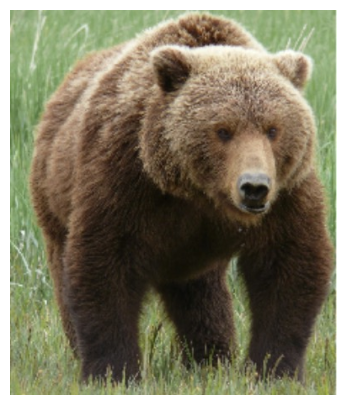

In [10]:
show_image(im)

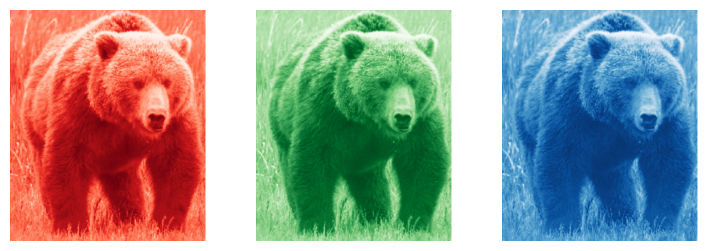

In [12]:
_,axs = subplots(1,3)
for bear, ax, color in zip(im, axs, ("Reds", "Greens", "Blues")):
    show_image(255-bear, ax=ax, cmap=color)

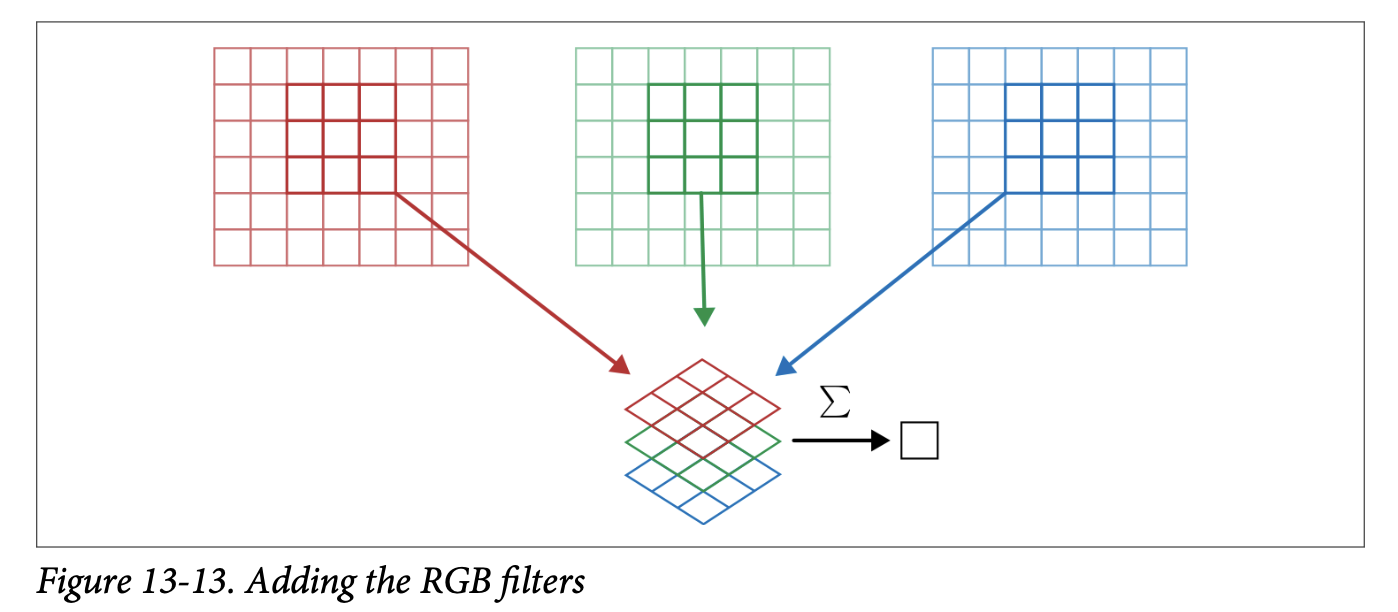

## Figure 13-13: Adding the RGB Filters

- **Step 1 – Separate Convolutions per Channel**  
  For an RGB image, the convolution is applied **independently** to each channel (Red, Green, Blue) using its own filter weights.  
  - Red channel → Red filter  
  - Green channel → Green filter  
  - Blue channel → Blue filter  

- **Step 2 – Element-wise Multiplication**  
  In each channel, the `3×3` filter is multiplied element-wise with the corresponding `3×3` image patch from that channel.

- **Step 3 – Summation Across Channels**  
  After convolution on each channel, the results are **summed** across channels to produce **one single value** for that spatial position in the output feature map.

- **Key Point**  
  The depth of the filter (number of channels in the kernel) **must match** the number of channels in the input image. This ensures that each color channel is processed and contributes to the final output.


## Key Points on Convolution with Color Images

- **Multiple Filters for Multiple Channels**  
  - For RGB images, the first convolutional layer has 3 input channels (R, G, B).  
  - Each channel has its own separate kernel (not shared across channels).  

- **Kernel Dimensions**  
  - For `ch_in` input channels and a kernel size of `ks x ks`, each filter has shape:  
    ```
    ch_in x ks x ks
    ```
  - With `ch_out` filters, total weight dimensions are:  
    ```
    ch_out x ch_in x ks x ks
    ```

- **Combining Channel Results**  
  - For one filter: convolve separately with each channel, then sum results across channels.
  - Optional bias `b` can be added:  
    ```
    y_R + y_G + y_B + b
    ```

- **No Special Setup for Color Images**  
  - Just ensure the first CNN layer’s `in_channels` matches the image channel count (e.g., 3 for RGB).

- **Color Processing Notes**  
  - Converting to grayscale loses all color information (can harm tasks where color is important).
  - Changing RGB to another color space (e.g., HSV) generally doesn’t affect performance as long as no information is lost.

## How CNN Filters Learn Useful Features

- Neural networks **do not require** humans to pre-design filters like edge detectors or pattern recognizers.
- Instead, **Stochastic Gradient Descent (SGD)** updates the filter weights to **minimize the loss function**.
- During training, the network automatically learns patterns in the data that help distinguish between classes.

### Key Idea:
- **Filter shapes evolve** to best represent useful features for reducing loss.
- In **early layers**: filters usually detect **edges, simple shapes, and basic textures**.
- In **deeper layers**: filters detect **complex, abstract patterns** that combine earlier features.

### Example:
- Even without explicitly designing an edge detection kernel, CNNs often learn one automatically because **edges are informative** for classification.
- This emerges purely from the optimization process that pushes filters toward capturing patterns most relevant to the task.



1. **Layer 1** → Edges & simple patterns  
2. **Layer 2** → Shapes & textures  
3. **Deeper Layers** → Abstract, task-specific features
